In [1]:
import numpy as np
import sympy as sy
sy.init_printing(use_unicode=False)

In [2]:
x=sy.symbols('x')
type(x)

sympy.core.symbol.Symbol

In [3]:

x

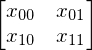

In [4]:
row,col=2,2
kwds=['x{}(0:{})'.format(i,col) for i in range(row) ]
symbols_row_col=np.array([sy.symbols(kwd) for kwd in kwds]).reshape(row,col)
symbols_row_col=sy.Matrix(symbols_row_col)
symbols_row_col

In [5]:
x,y,z=sy.symbols('x y z')
x,y,z#x,y,zを要素とするタプルです．

In [6]:
#連番記号を定義できるよ．
sy.symbols('a:3')

In [7]:
sy.symbols('c2(3:6)')

In [8]:
sy.symbols(':z')

In [9]:
sy.symbols('x(b:d)')

In [10]:
sy.symbols('(x:y)(0:2)')

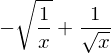

In [11]:
#数式表現
x=sy.symbols('x')
1/sy.sqrt(x)-sy.sqrt(1/x)

In [12]:
x=sy.symbols('x',positive=True)
1/sy.sqrt(x)-sy.sqrt(1/x)

In [13]:
myinteger=sy.Integer(5)
myinteger

In [14]:
myinteger-4

In [15]:
x=sy.Rational('1/3')
y=sy.Rational('1/2')
x+y

In [16]:
x**y

In [17]:
x=sy.symbols('x')
f=sy.Lambda(x,2*x)
f(4)

In [18]:
x,y=sy.symbols('x,y')
g=sy.Lambda((x,y),x**2+y**2)
g

In [19]:
#evaluate!
g(3,4)

In [20]:
#define equation

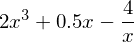

In [21]:
x=sy.symbols('x')
eq1=0.5*x+2*x**3-4/x
eq1

In [22]:
eq2=x**2+2*x*(x+1)+1
eq2

In [23]:
sy.simplify(eq2)

In [24]:
eq2.simplify()

In [25]:
eq3=x**2+2*x+1
eq3

In [26]:
eq3.factor()

In [27]:
x,y,z=sy.symbols('x y z')
eq4=((1+2*x+y+3*z)**2).expand()
eq4

In [28]:
eq4.collect(x)

In [29]:
eq4.collect([x,y])

In [30]:
eq4.collect([y,x])

# 部分分数分解

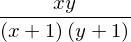

In [31]:
x,y=sy.symbols('x y')
eq=x*y/((x+1)*(y+1))
eq

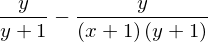

In [32]:
#部分分数分解
eq.apart(x)

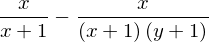

In [33]:
eq.apart(y)

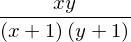

In [34]:
eq.apart(x).together(x)

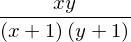

In [35]:
eq.apart(x).simplify()

# 代入


In [36]:
x,y,z=sy.symbols('x y z')
(x+x*y).subs(x,y)

In [37]:
(sy.sin(x)).subs(sy.sin,sy.cos)

In [38]:
#辞書型にまとめて指定することができる．
sy.log(x+y).subs({x:sy.sqrt(y),y:z,sy.log:sy.exp})

In [39]:
x,y,z=sy.symbols('x y z')
eq=x+y+z
eq.subs({x:0.1,y:0.3,z:0.5})

In [40]:
eq.subs({y:x,z:x})

In [41]:
x=sy.symbols('x')
eq=1+x+x**2
[eq.subs(x,xx).evalf() for xx in range(5)]

In [42]:
import numpy as np
x=sy.symbols('x')
eq=1+x+x**2
eqf=sy.lambdify(x,eq,'numpy')
v=np.arange(5)
eqf(v)

array([ 1,  3,  7, 13, 21])

# 微分


In [43]:
f=sy.Function('f')(x)
f

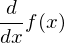

In [44]:
sy.diff(f,x)

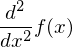

In [45]:
f.diff(x,2)

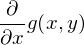

In [46]:
g=sy.Function('g')(x,y)
g.diff(x)

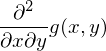

In [47]:
g.diff(x,y)

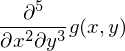

In [48]:
g.diff(x,2,y,3)

In [49]:
eq=sy.cos(x**2)+sy.exp(x)+x**3
eq

In [50]:
eq.diff(x)

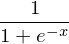

In [51]:
sigmoid=1/(1+sy.exp(-x))
sigmoid

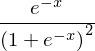

In [52]:
sigmoid.diff(x)

# solve equation


In [53]:
import sympy as sy


In [54]:
x=sy.symbols('x')
sy.solve(x**2-1)

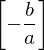

In [55]:
a,b=sy.symbols('a b')
sy.solve(a*x+b,x)

In [56]:
ans=sy.solve(x**5-x-1,x)
ans

In [57]:
type(ans[0])

sympy.polys.rootoftools.ComplexRootOf

In [58]:
[sy.N(i) for i in ans]

#　連立方程式


In [59]:
x,y=sy.symbols('x y')
eq1=x+y-7
eq2=-3*x-y+5
ans=sy.solve([eq1,eq2],[x,y])
ans

In [60]:
ans[x],ans[y]#辞書型でリターンするので参照が左のようにできる．

# matrix

In [61]:
sy.Matrix([1,5])

In [62]:
sy.Matrix([[1,3]])

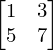

In [63]:
sy.Matrix([[1,3],[5,7]])

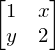

In [64]:
x,y=sy.symbols('x y')
M=sy.Matrix([[1,x],[y,2]])
M

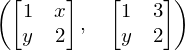

In [65]:
N=M.subs({x:3})# deep copy maybe...
M,N

In [66]:
A=sy.Matrix([[1,3],[5,7]])
v=sy.Matrix(sy.symbols('x y'))
v

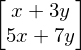

In [67]:
a=A*v
a

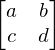

In [68]:
B=sy.Matrix([sy.symbols('a b'),sy.symbols('c d')])
B


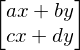

In [69]:
w=sy.Matrix(sy.symbols('x y'))
b=B*w
b

In [70]:
b.T#transpose

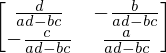

In [71]:
C=B.inv()
C

# draw fraction graph

In [78]:
def convert_input(string):
    expr=sy.sympify(string)
    #find the symbol that expr uses with sym, = expr.free_symbols
    sym, = expr.free_symbols
    x=sy.Symbol(sym.name, real=True)
    expr=expr.subs(sym,x)
    frac=sy.cancel(sy.together(expr))
    return frac, x

In [79]:
frac, x = convert_input('1/(x+1) + 1/(x-1) + x+1')

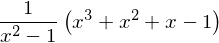

In [80]:
frac

In [83]:
den=sy.denom(frac)
poles=sy.solve(den,x)
poles

In [85]:
domain=sy.Interval(-sy.oo,sy.oo)-sy.FiniteSet.fromiter(poles)
domain

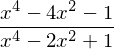

In [88]:
deriv=sy.cancel(sy.diff(frac,x))
deriv

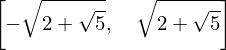

In [90]:
extrema=sy.solve(deriv,x)
extrema

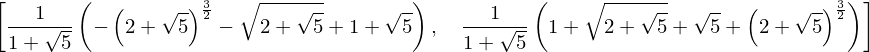

In [92]:
extrema_values=[frac.subs(x,x0) for x0 in extrema]
extrema_values

# calc asymptotes

In [98]:
m=sy.limit(frac/x,x,sy.oo)
p=sy.limit(frac-m*x,x,sy.oo)
m,p

In [109]:
def find_asymptotes(expr,x):
    """
    return m,p such that y=x*m+p is an asymptote to the curve y=expr.
    If there is no asymptote, return None
    """
    m=sy.limit(frac/x,x,sy.oo)
    try:
        if not m.is_bounded:
            return None
        else:
            p=sy.limit(frac-m*x,x,sy.oo)
        return m,p
    except:
        pass
   

In [110]:
[find_asymptotes(e,x) for e  in (frac, x**2,x**2/(x**2+1))]

[None, None, None]

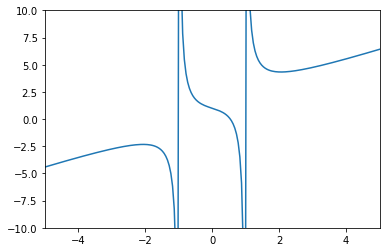

In [114]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

def plot_curve(expr,x,xmin,xmax,ymin,ymax):
    func=sy.lambdify([x],expr)
    xs=np.linspace(xmin,xmax,200)
    plt.plot(xs,func(xs))
    plt.ylim(ymin,ymax)
    plt.xlim(xmin,xmax)

plot_curve(frac,x,-5,5,-10,10)